### **Bussiness Understanding**
Perusahaan saat ini sedang dilanda masalah besar, banyak karyawan yang mengajukan pengunduran diri namun perusahaan belum mengambil keputusan untuk hal itu. Bantulah perusahaan untuk menjelaskan kondisi karyawannya saat ini, serta menelusuri permasalahan yang ada dalam perusahaan yang menyebabkan karyawan itu resign sehingga dapat ***mengurangi tingkat resign dari karyawan***, dan dapat menjabarkan suatu strategi yang dapat meningkatkan retensi dari karyawan. Anda dapat menyajikan temuan deskriptif dari data menggunakan data visualisasi dan data storytelling, serta bisa mendapatkan temuan inferensial menggunakan pendekatan analisis statistik atau machine learning dengan framework seperti Interpretable & Explainable AI dalam mengkonversikan temuan model kedalam sebuah cerita.


In [70]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **EDA**

In [71]:
#show all column and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [72]:
df = pd.read_excel('improving.xlsx')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


### **Data Understanding**

| Nama Fitur                         | Deskripsi Fitur                                 |
|------------------------------------|-------------------------------------------------|
| Username                           | Username karyawan                               |
| EnterpriseID                       | Nomor induk karyawan                            |
| StatusPernikahan                   | Status pernikahan karyawan                      |
| JenisKelamin                       | Jenis kelamin karyawan                          |
| StatusKepegawaian                  | Status kepegawaian karyawan                     |
| Pekerjaan                          | Posisi pekerjaan karyawan                       |
| JenjangKarir                       | Tingkat karir karyawan                          |
| PerformancePegawai                 | Nilai kinerja karyawan                          |
| AsalDaerah                         | Asal daerah karyawan                            |
| HiringPlatform                     | Platform yang digunakan untuk merekrut karyawan |
| SkorSurveyEngagement               | Skor survei keterlibatan karyawan               |
| SkorKepuasanPegawai                | Skor kepuasan karyawan                          |
| JumlahKeikutsertaanProjek          | Jumlah proyek yang diikuti oleh karyawan        |
| JumlahKeterlambatanSebulanTerakhir | Jumlah keterlambatan bulanan terbaru karyawan   |
| JumlahKetidakhadiran               | Jumlah ketidakhadiran karyawan                  |
| NomorHP                            | Nomor ponsel karyawan                           |
| Email                              | Alamat email karyawan                           |
| TingkatPendidikan                  | Tingkat pendidikan karyawan                     |
| PernahBekerja                      | Pengalaman kerja karyawan                       |
| IkutProgramLOP                     | Partisipasi dalam program LOP                   |
| AlasanResign                       | Alasan pengunduran diri karyawan                |
| TanggalLahir                       | Tanggal lahir karyawan                          |
| TanggalHiring                      | Tanggal perekrutan karyawan                     |
| TanggalPenilaianKaryawan           | Tanggal penilaian kinerja karyawan              |
| TanggalResign                      | Tanggal pengunduran diri karyawan               |

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [74]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


In [76]:
# check duplicates data
df.duplicated().sum()

0

In [77]:
# grouping colomn into categorical and numerical
df_cat = ['StatusPernikahan','JenisKelamin','StatusKepegawaian','Pekerjaan','JenjangKarir','PerformancePegawai','AsalDaerah','NomorHP','Email','TingkatPendidikan','PernahBekerja','AlasanResign','TanggalLahir','TanggalHiring','TanggalPenilaianKaryawan','TanggalResign','HiringPlatform']
df_num =['EnterpriseID','SkorSurveyEngagement','SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran','IkutProgramLOP']

In [78]:
# check unique values

for i in df_cat:
    print(f'===={i}====')
    print(df[i].value_counts(),end='\n\n')

====StatusPernikahan====
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

====JenisKelamin====
Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64

====StatusKepegawaian====
FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

====Pekerjaan====
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: Pekerjaan, dtype: int64

====JenjangKarir====
Freshgraduate_program    169

In [79]:
df[df_cat].describe().T

,count,unique,top,freq
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
NomorHP,287,287,+6282232522xxx,1
Email,287,287,spiritedPorpoise3135@yahoo.com,1
TingkatPendidikan,287,3,Sarjana,176


In [80]:
df[df_num].describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


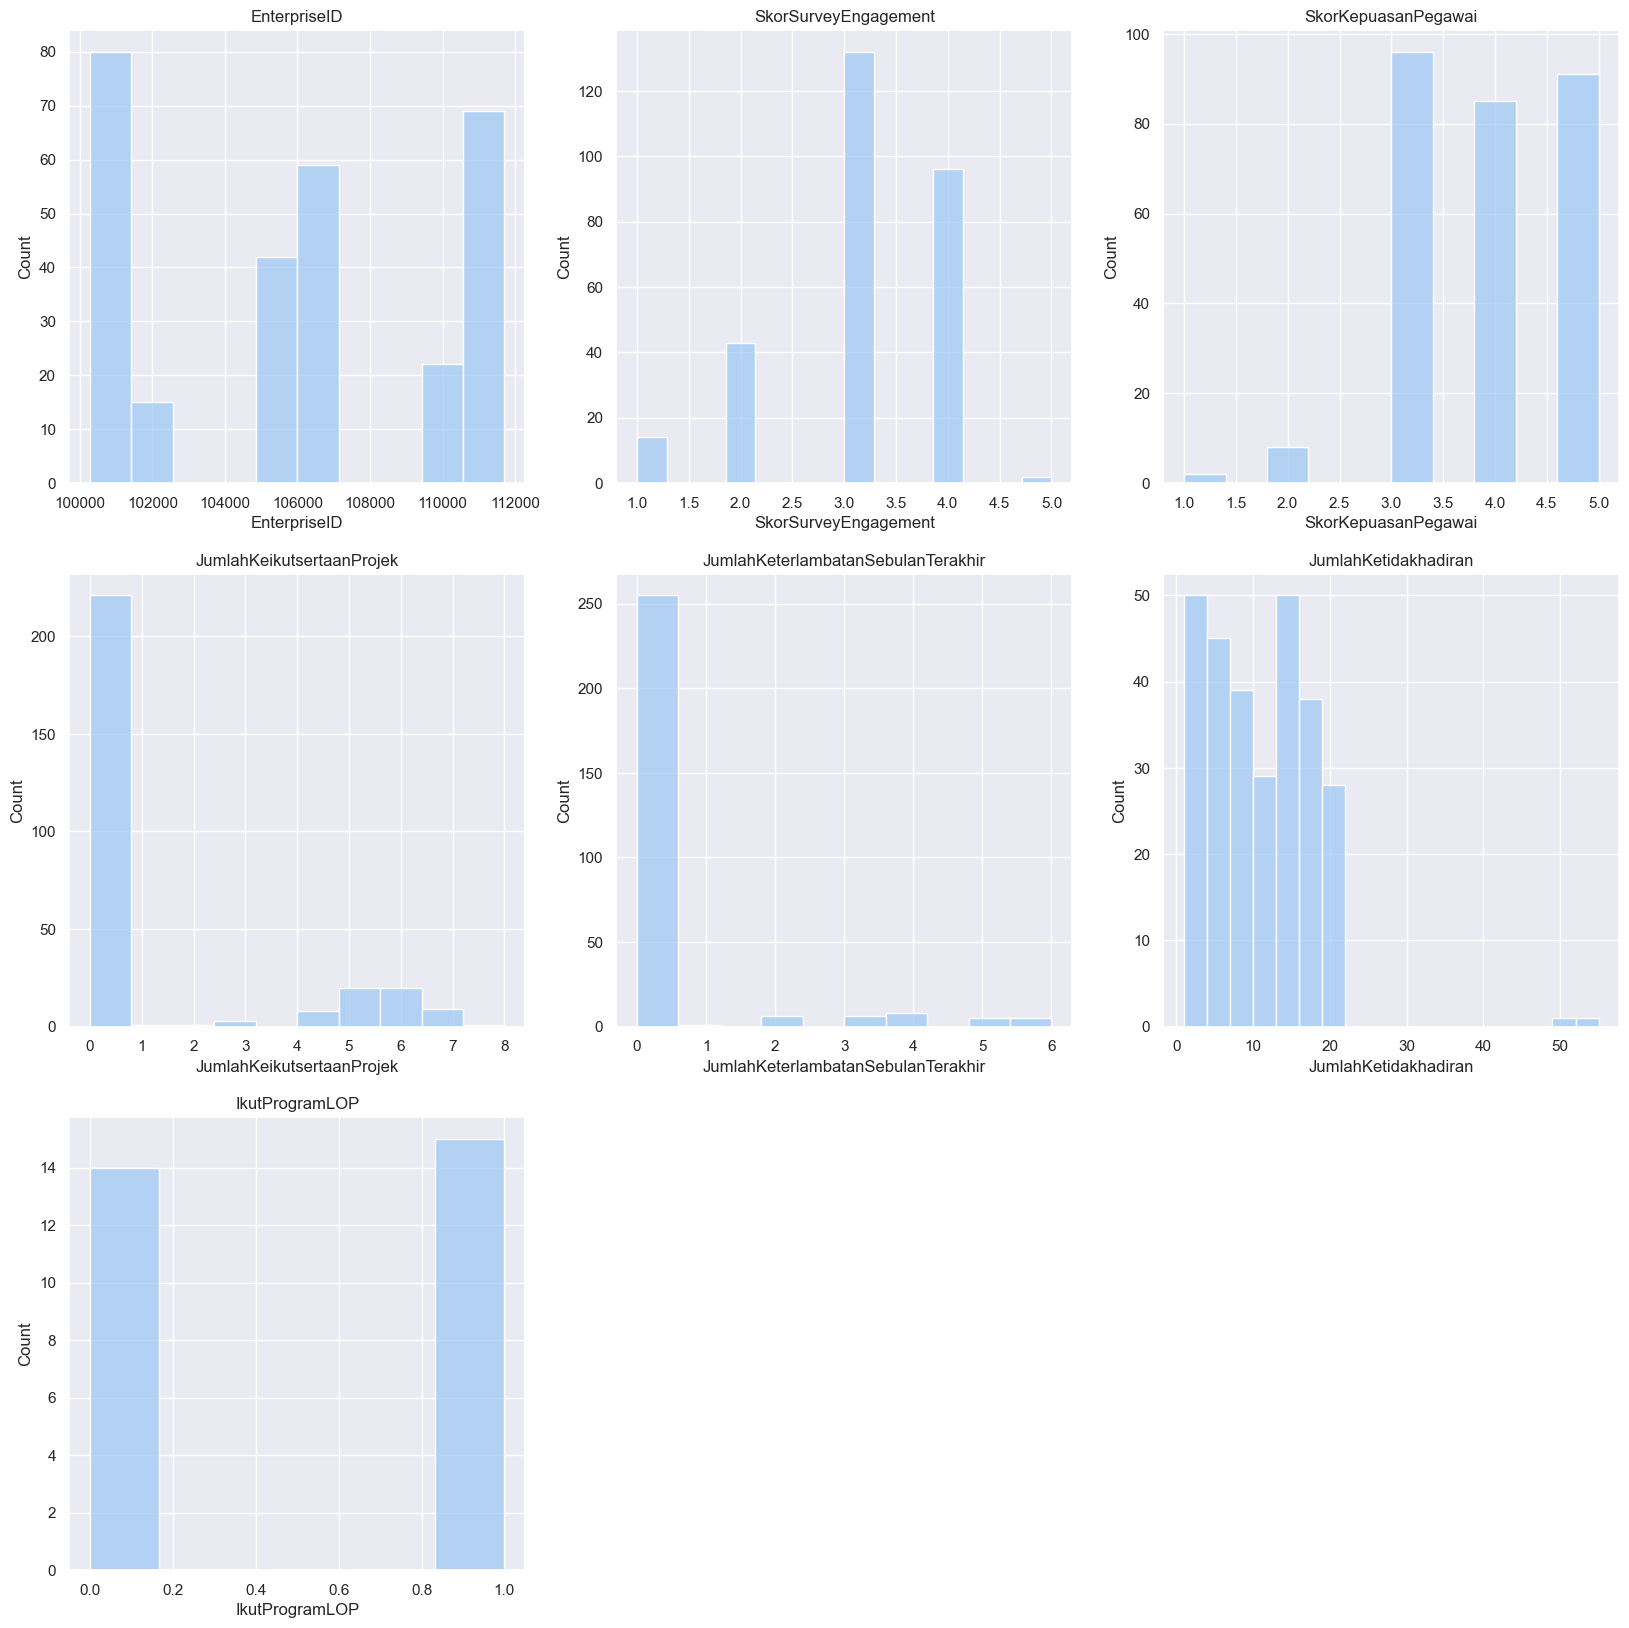

In [81]:
# lets create visualization for numerical data using displot

plt.figure(figsize=(20,20))
for i in range(0,len(df_num)):
    plt.subplot(3,3,i+1)
    ax = sns.histplot(data=df,x=df_num[i])
    plt.title(df_num[i])


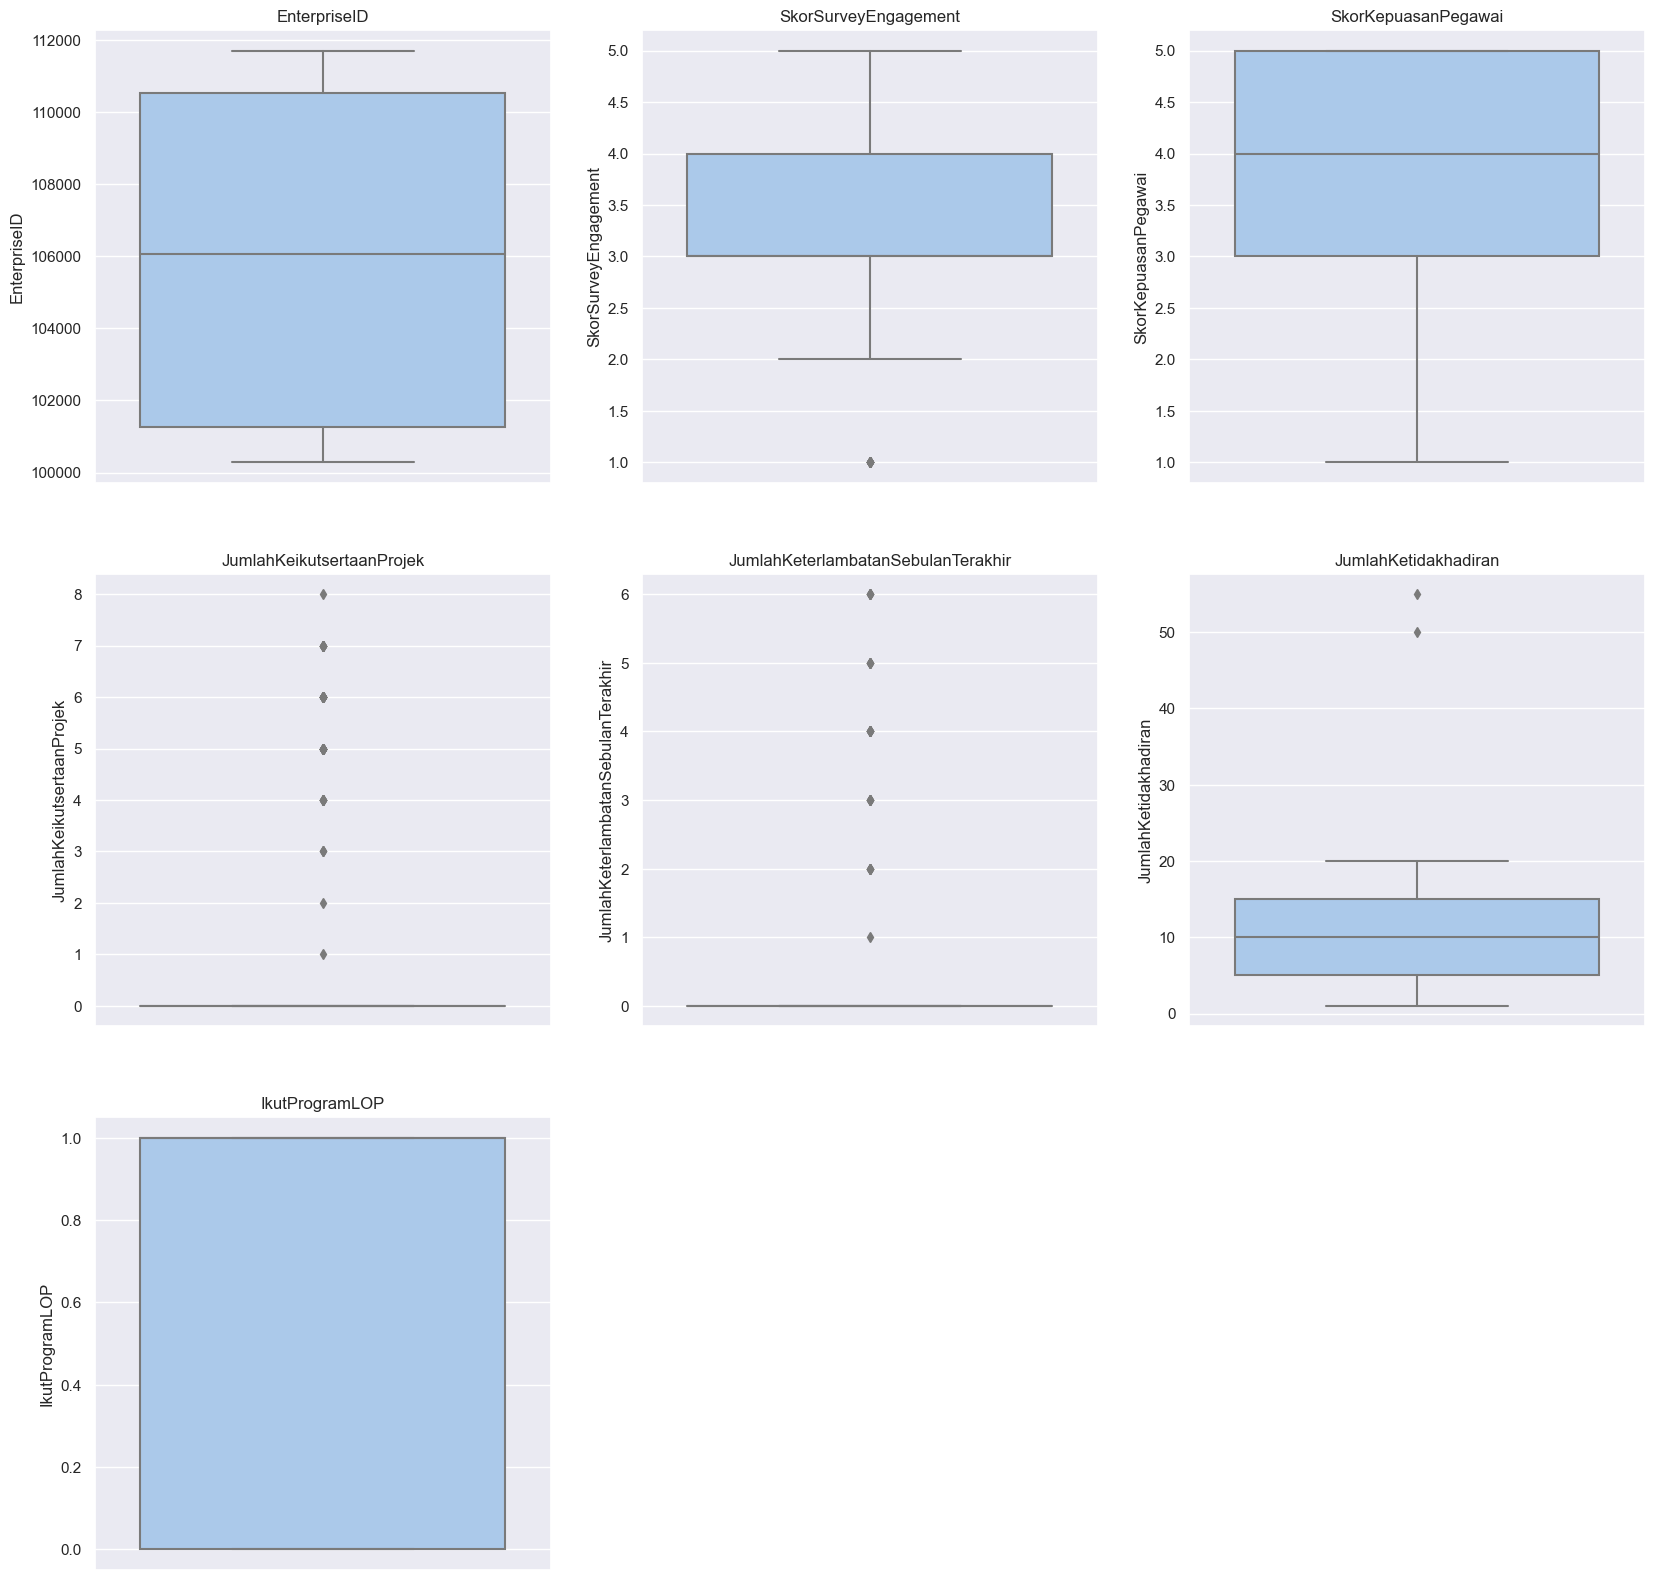

In [82]:
# check outliers visualization using boxplot

plt.figure(figsize=(20,20))
for i in range(0,len(df_num)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data=df,y=df_num[i])
    plt.title(df_num[i])

/var/folders/x8/g53p23zs4xb2b1w8ybz3nzjw0000gn/T/ipykernel_3598/2695061147.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,4,i+1)


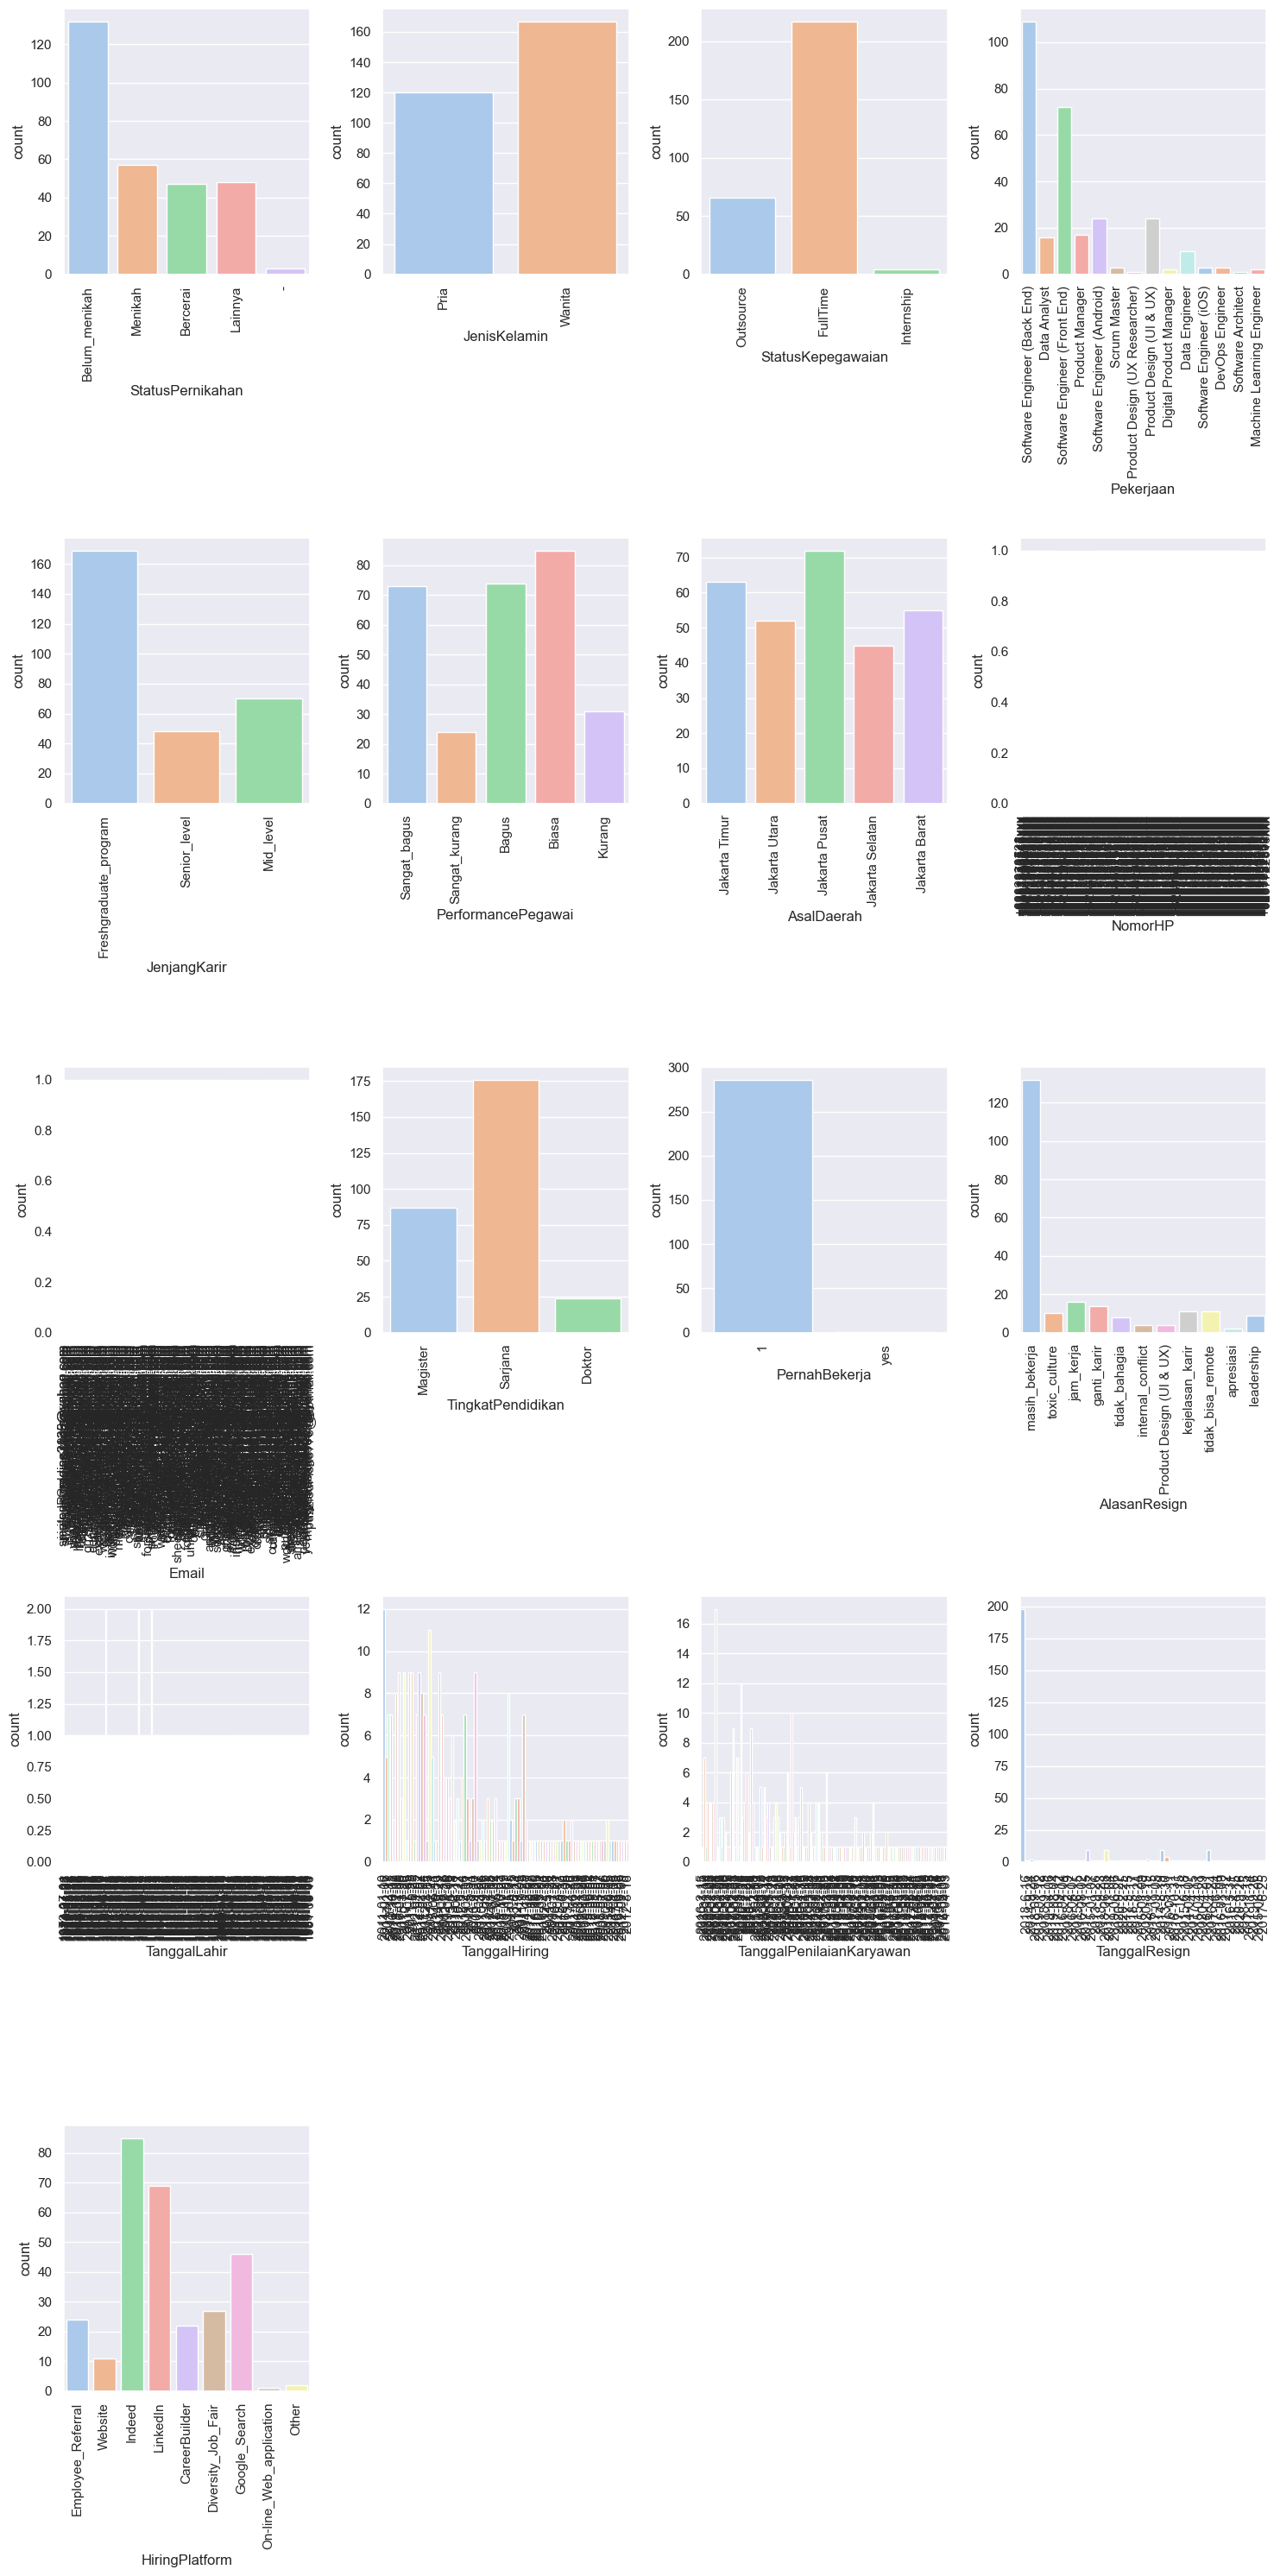

In [83]:
# let's create visualization for categorical data using countplot

fig, axes = plt.subplots(figsize=(15,30))
for i in range(len(df_cat)):
    plt.subplot(5,4,i+1)
    grap = sns.countplot(data=df,x=df_cat[i] , palette='pastel')
    sns.set_theme(style="darkgrid", palette="pastel")

    #set ticks labels
    grap.set_xticklabels(grap.get_xticklabels(),rotation=90)

plt.tight_layout()

/var/folders/x8/g53p23zs4xb2b1w8ybz3nzjw0000gn/T/ipykernel_3598/2358494577.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,i+1)


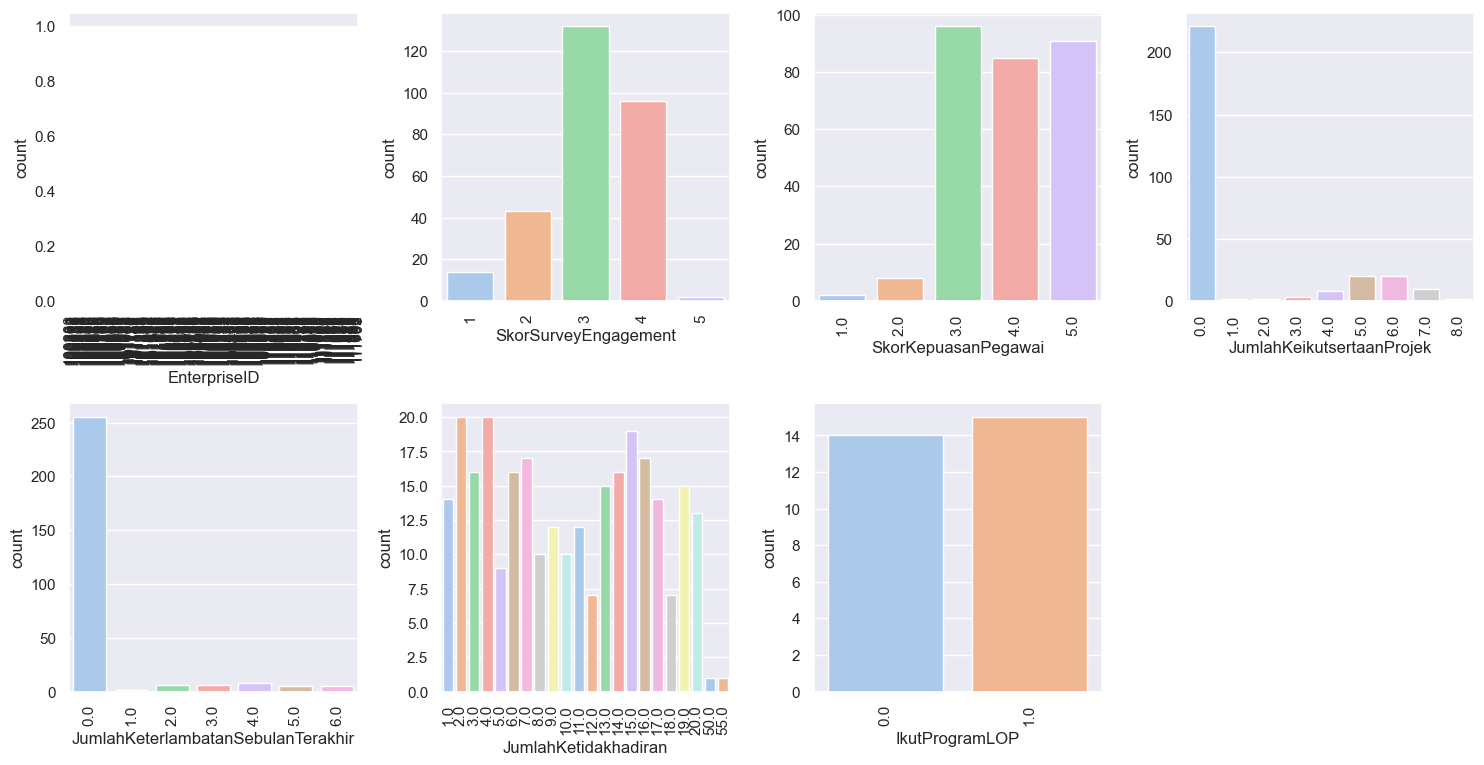

In [84]:
# let's create visualization for numerical data using countplot

fig, axes = plt.subplots(figsize=(15,15))
for i in range(len(df_num)):
    plt.subplot(4,4,i+1)
    grap = sns.countplot(data=df,x=df_num[i] , palette='pastel')
    sns.set_theme(style="darkgrid", palette="pastel")

    #set ticks labels
    grap.set_xticklabels(grap.get_xticklabels(),rotation=90)

plt.tight_layout()

/var/folders/x8/g53p23zs4xb2b1w8ybz3nzjw0000gn/T/ipykernel_3598/274568009.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

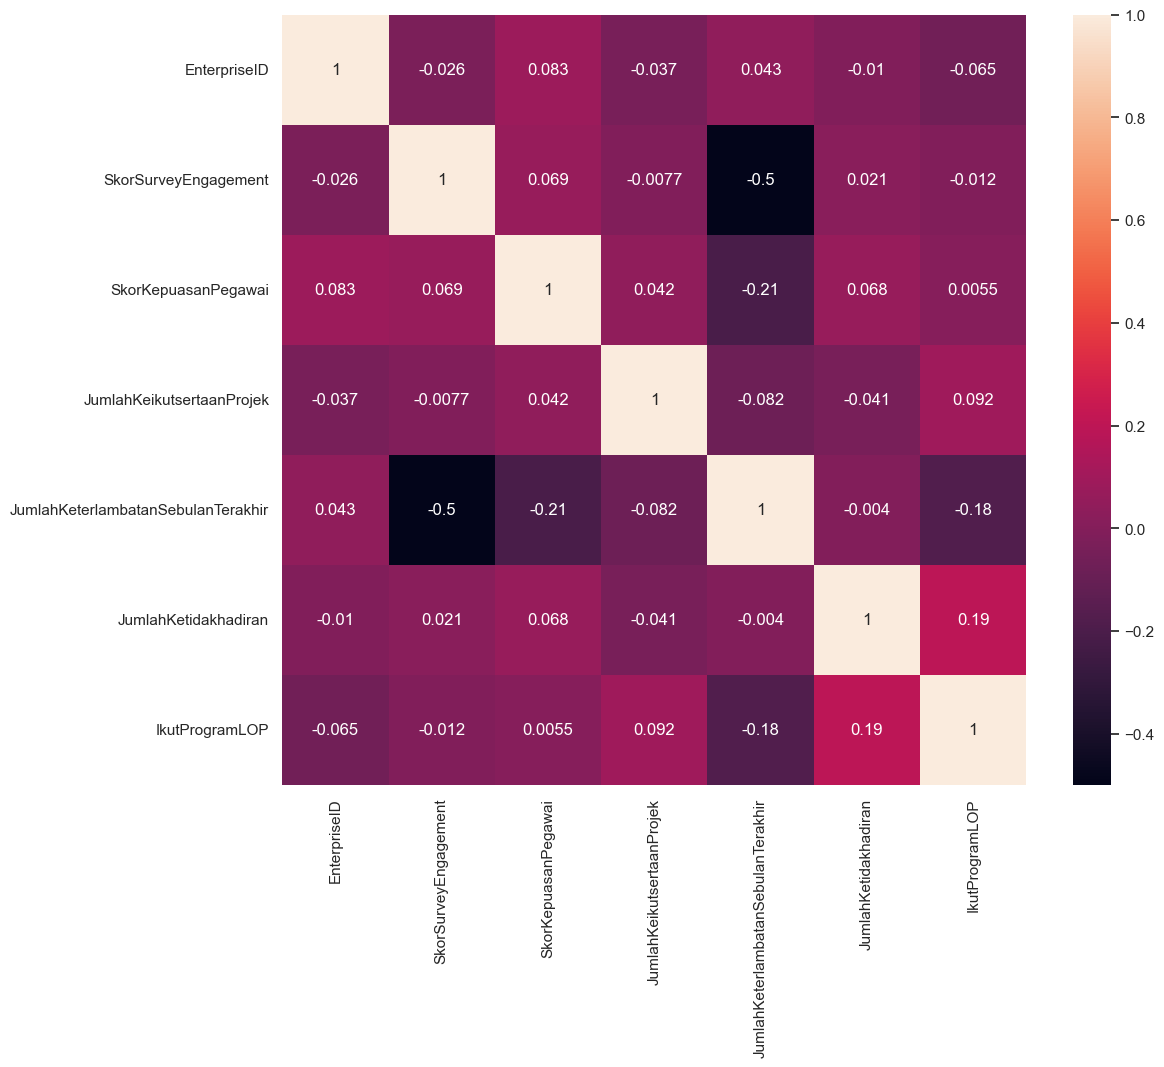

In [85]:
# create visualization for correlation

corr = df.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot=True, ax=ax)


### **Data Preprocessing**

In [86]:
#drop unneeded columns
df_prep = df.copy()


In [87]:
# transform column TanggalLahir

df_prep['TanggalLahir'] = pd.to_datetime(df_prep['TanggalLahir'], format='%Y/%m/%d')

In [88]:
# create Age column
df_prep['Age'] = 2023 - df_prep['TanggalLahir'].dt.year
df_prep.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Age
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,51
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,39
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,49
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,44
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,49


In [89]:
df_prep = df_prep.drop(['TanggalLahir'],axis=1)

In [90]:
df_prep.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Age
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,2011-01-10,2016-2-15,-,51
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,2014-01-06,2020-1-17,2018-6-16,39
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,2011-01-10,2016-01-10,2014-9-24,49
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,2014-2-17,2020-02-04,-,44
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,2013-11-11,2020-1-22,2018-09-06,49


In [91]:
#check unique values of StatusPernikahan
df_prep['StatusPernikahan'].unique()

array(['Belum_menikah', 'Menikah', 'Bercerai', 'Lainnya', '-'],
      dtype=object)

In [92]:
# replace value of StatusPernikahan
df_prep['StatusPernikahan'] = df_prep['StatusPernikahan'].replace(['Bercerai','Lainnya','-'],'Belum_menikah')
df_prep['StatusPernikahan'].unique()

array(['Belum_menikah', 'Menikah'], dtype=object)

In [93]:
#check unique values of Pekerjaan
df_prep['Pekerjaan'].unique()

array(['Software Engineer (Back End)', 'Data Analyst',
       'Software Engineer (Front End)', 'Product Manager',
       'Software Engineer (Android)', 'Scrum Master',
       'Product Design (UX Researcher)', 'Product Design (UI & UX)',
       'Digital Product Manager', 'Data Engineer',
       'Software Engineer (iOS)', 'DevOps Engineer', 'Software Architect',
       'Machine Learning Engineer'], dtype=object)

In [94]:
# replace value of Pekerjaan
df_prep['Pekerjaan'] = df_prep['Pekerjaan'].replace({
        'Software Engineer (Back End)':'Software Engineer',
        'Software Engineer (Front End)':'Software Engineer',
        'Software Engineer (Android)':'Software Engineer',
        'Software Engineer (iOS)':'Software Engineer',
        'Product Design (UX Researcher)':'UX Researcher',
        'Product Design (UI & UX)':'UI & UX Design',
})

print(df_prep['Pekerjaan'].unique())

['Software Engineer' 'Data Analyst' 'Product Manager' 'Scrum Master'
 'UX Researcher' 'UI & UX Design' 'Digital Product Manager'
 'Data Engineer' 'DevOps Engineer' 'Software Architect'
 'Machine Learning Engineer']


In [95]:
# encode PerformancePegawai column

df_prep['PerformancePegawai']= df_prep['PerformancePegawai'].replace({
    'Sangat_kurang':1,
    'Kurang':2,
    'Biasa':3,
    'Bagus':4,
    'Sangat_bagus':5
})

print(df_prep['PerformancePegawai'].unique())

[5 1 4 3 2]


In [96]:
# encode TingkatPendidikan column

df_prep['TingkatPendidikan']= df_prep['TingkatPendidikan'].replace({
    'Sarjana':'S1',
    'Magister':'S2',
    'Doktor':'S3'
})

print(df_prep['TingkatPendidikan'].unique())

['S2' 'S1' 'S3']


In [97]:
df_prep['AlasanResign'].value_counts()

masih_bekerja               132
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

In [98]:
# encode AlasanResign column

df_prep['AlasanResign']= df_prep['AlasanResign'].replace({
    
    'ganti_karir':'karir',
    'kejelasan_karir':'karir',
    'apresiasi':'karir',
    'Product Design (UI & UX)':'karir',
    'tidak_bisa_remote':'jam_kerja',
    'toxic_culture':'konflik_internal',
    'leadership':'konflik_internal',
    'tidak_bahagia':'konflik_internal',
    'internal_conflict':'konflik_internal'
})

print(df_prep['AlasanResign'].unique())

['masih_bekerja' 'konflik_internal' 'jam_kerja' 'karir' nan]


In [99]:
#lets check is the feautures have any missing value
print(df_prep.isnull().values.any())

# summarize missing value
total = df_prep.isnull().sum().sort_values(ascending=False)
percent = (df_prep.isnull().sum()/df_prep.isnull().count()).sort_values(ascending=False)

null_val = pd.concat()

True
IkutProgramLOP                        258
AlasanResign                           66
JumlahKetidakhadiran                    6
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
TanggalResign                           0
TanggalPenilaianKaryawan                0
TanggalHiring                           0
PernahBekerja                           0
TingkatPendidikan                       0
Email                                   0
NomorHP                                 0
Username                                0
EnterpriseID                            0
SkorSurveyEngagement                    0
HiringPlatform                          0
AsalDaerah                              0
PerformancePegawai                      0
JenjangKarir                            0
Pekerjaan                               0
StatusKepegawaian                       0
JenisKelamin                            0
StatusPernikahan             

In [100]:
df_prep = df_prep.drop(['EnterpriseID','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran','IkutProgramLOP','TanggalPenilaianKaryawan','TanggalHiring','PernahBekerja','Email','NomorHP','JumlahKetidakhadiran','JumlahKeterlambatanSebulanTerakhir','JumlahKeikutsertaanProjek','HiringPlatform','AsalDaerah','Username'],axis=1)